# **EA FC 24 Data Analysis End-to-End Project**

## Introduction
Football (soccer) is a big part of my life and one of my biggest passions since birth. I have been watching and learning about it since I was a child until now when I started to enjoy football in a tactical analyst way. This project works with a database I have used to use through my whole childhood and teenage years, but the models could be easily implemented to modern-day big data in real football, which is used by Data Analyst in football scouting teams, a job I am eager to take someday.

In this notebook, I worked on an end-to-end project analyzing data from FIFA 15 to EA FC 24. The goal is to perform data scrubbing, exploration, modelling and interpretation to uncover insights from the dataset of male football players. We will use various Python libraries to process the data and generate meaningful visualizations and models, which will help FIFA players meet their goals when searching for players to buy in the game's different modes, either by price quality or just by potential. 

## Project Outline

### 1. **[Data Scrubbing](#data-scrubbing)**
### 2. **[Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)**
### 3. **[Modelling](#modelling)**
### 4. **[Interpretation](#interpretation)**
### 5. **[Tableau Dashboard](https://public.tableau.com/views/TableauProject_17241256666710/Dashboard1?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)**
### 6. **[Conclusion](#conclusion)**

## Bibliography
- **Python Libraries Used:**
  - `pandas` : For numerical operations and data manipulation.
  - `numpy` : For numerical operations and data manipulation.
  - `plotly` : For interactive visualizations.
  - `sci-kit-learn` : For data preprocessing and machine learning tasks.
  - `scipy` : For additional statistical and optimization functions.
- **Data Source:**
  - The data used in this analysis is sourced from [EAFC 24 player database](https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset).

Feel free to navigate through the sections, and learn about the analysis!

---

<a id="data-scrubbing"></a>
## **Data Scrubbing**

### Importing Libraries

In [15]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import plotly
import re
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
print('modules are imported')

modules are imported


### Reading the database

In [16]:
df_24 = pd.read_csv('male_players.csv', on_bad_lines='skip', low_memory=False)

In [17]:
df_24.head()

player_id                             player_url  fifa_version  \
0     231747    /player/231747/kylian-mbappe/240002          24.0   
1     239085   /player/239085/erling-haaland/240002          24.0   
2     192985  /player/192985/kevin-de-bruyne/240002          24.0   
3     158023     /player/158023/lionel-messi/240002          24.0   
4     165153    /player/165153/karim-benzema/240002          24.0   

   fifa_update update_as_of    short_name                       long_name  \
0          2.0   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1          2.0   2023-09-22    E. Haaland            Erling Braut Haaland   
2          2.0   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3          2.0   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4          2.0   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential  ...   ldm   cdm   rdm   rwb    lb  \
0           ST, LW       91         94  ...  63+3  63+3  63+3  68+3  63+3   
1               ST       91         94  ...  63+3  63+3  63+3  62+3  60+3   
2          CM, CAM       91         91  ...  80+3  80+3  80+3  79+3  75+3   
3          CF, CAM       90         90  ...  63+3  63+3  63+3  64+3  59+3   
4           CF, ST       90         90  ...  64+3  64+3  64+3  64+3  60+3   

    lcb    cb   rcb    rb    gk  
0  54+3  54+3  54+3  63+3  18+3  
1  62+3  62+3  62+3  60+3  19+3  
2  70+3  70+3  70+3  75+3  21+3  
3  49+3  49+3  49+3  59+3  19+3  
4  55+3  55+3  55+3  60+3  18+3  

[5 rows x 109 columns]

In [18]:
df_24.shape

(180021, 109)

### Analyzing the columns

In [19]:
cols = list(df_24.columns)
print(cols)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

In [20]:
# Define a list of columns that are not necessary for our analysis
# These columns include player metadata, IDs, URLs, and other non-essential details
useless_columns = ['dob','player_id', 'player_url', 'long_name', 'real_face', 'nation_position', 'nation_jersey_number', 'fifa_update', 'update_as_of', 'club_team_id', 'league_id', 'club_loaned_from', 'club_joined_date', 'nationality_id', 'nation_team_id']

# Drop the columns listed in 'useless_columns' from the DataFrame
# This step helps to reduce the dataset to only the relevant
df_clean = df_24.drop(useless_columns, axis=1)

### Creating a BMI category

In [21]:
# Calculate the Body Mass Index (BMI) for each player
df_clean['BMI'] = df_clean['weight_kg'] / (df_clean['height_cm'] / 100) ** 2
df_clean.head()

fifa_version    short_name player_positions  overall  potential  \
0          24.0     K. Mbappé           ST, LW       91         94   
1          24.0    E. Haaland               ST       91         94   
2          24.0  K. De Bruyne          CM, CAM       91         91   
3          24.0      L. Messi          CF, CAM       90         90   
4          24.0    K. Benzema           CF, ST       90         90   

     value_eur  wage_eur  age  height_cm  weight_kg  ...   cdm   rdm   rwb  \
0  181500000.0  230000.0   24        182         75  ...  63+3  63+3  68+3   
1  185000000.0  340000.0   22        195         94  ...  63+3  63+3  62+3   
2  103000000.0  350000.0   32        181         75  ...  80+3  80+3  79+3   
3   41000000.0   23000.0   36        169         67  ...  63+3  63+3  64+3   
4   51000000.0   95000.0   35        185         81  ...  64+3  64+3  64+3   

     lb   lcb    cb   rcb    rb    gk        BMI  
0  63+3  54+3  54+3  54+3  63+3  18+3  22.642193  
1  60+3  62+3  62+3  62+3  60+3  19+3  24.720579  
2  75+3  70+3  70+3  70+3  75+3  21+3  22.893074  
3  59+3  49+3  49+3  49+3  59+3  19+3  23.458562  
4  60+3  55+3  55+3  55+3  60+3  18+3  23.666910  

[5 rows x 95 columns]

In [22]:
# Print the data type of the 'BMI' column
print(df_clean['BMI'].dtype)

float64


### Creating a new postions category
This will be used later for a player filtering tool.

In [23]:
df_clean[['short_name','player_positions']]

short_name player_positions
0          K. Mbappé           ST, LW
1         E. Haaland               ST
2       K. De Bruyne          CM, CAM
3           L. Messi          CF, CAM
4         K. Benzema           CF, ST
...              ...              ...
180016     E. Redman               CB
180017    A. Collins               ST
180018      P. Żemło           LM, LB
180019     T. Davies               CB
180020    P. Tisdale          CM, CAM

[180021 rows x 2 columns]

In [24]:
# Convert the 'player_positions' column, which contains multiple positions separated by commas, into separate binary columns
# The resulting columns are prefixed with 'Position_'
new_player_positions = df_clean['player_positions'].str.get_dummies(sep=', ').add_prefix('Position_')
new_player_positions.head()

Position_CAM  Position_CB  Position_CDM  Position_CF  Position_CM  \
0             0            0             0            0            0   
1             0            0             0            0            0   
2             1            0             0            0            1   
3             1            0             0            1            0   
4             0            0             0            1            0   

   Position_GK  Position_LB  Position_LM  Position_LW  Position_LWB  \
0            0            0            0            1             0   
1            0            0            0            0             0   
2            0            0            0            0             0   
3            0            0            0            0             0   
4            0            0            0            0             0   

   Position_RB  Position_RM  Position_RW  Position_RWB  Position_ST  
0            0            0            0             0            1  
1            0            0            0             0            1  
2            0            0            0             0            0  
3            0            0            0             0            0  
4            0            0            0             0            1

In [25]:
# Adding the new columns to the cleaned database
df_clean=pd.concat([df_clean,new_player_positions],axis=1)

In [26]:
# Dropping the no longer needed column
df_clean = df_clean.drop('player_positions',axis=1)
df_clean.head()

fifa_version    short_name  overall  potential    value_eur  wage_eur  age  \
0          24.0     K. Mbappé       91         94  181500000.0  230000.0   24   
1          24.0    E. Haaland       91         94  185000000.0  340000.0   22   
2          24.0  K. De Bruyne       91         91  103000000.0  350000.0   32   
3          24.0      L. Messi       90         90   41000000.0   23000.0   36   
4          24.0    K. Benzema       90         90   51000000.0   95000.0   35   

   height_cm  weight_kg            club_name  ... Position_GK  Position_LB  \
0        182         75  Paris Saint Germain  ...           0            0   
1        195         94      Manchester City  ...           0            0   
2        181         75      Manchester City  ...           0            0   
3        169         67          Inter Miami  ...           0            0   
4        185         81           Al Ittihad  ...           0            0   

  Position_LM  Position_LW  Position_LWB Position_RB Position_RM  Position_RW  \
0           0            1             0           0           0            0   
1           0            0             0           0           0            0   
2           0            0             0           0           0            0   
3           0            0             0           0           0            0   
4           0            0             0           0           0            0   

   Position_RWB  Position_ST  
0             0            1  
1             0            1  
2             0            0  
3             0            0  
4             0            1  

[5 rows x 109 columns]

### Fixing the position and attributes ratings

In [27]:
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk']

In [28]:
df_clean[columns].head()

ls    st    rs  lw  lf  cf  rf  rw   lam   cam  ...   ldm   cdm   rdm  \
0  90+3  90+3  90+3  91  91  91  91  91  89+3  89+3  ...  63+3  63+3  63+3   
1  90+3  90+3  90+3  82  86  86  86  82  82+3  82+3  ...  63+3  63+3  63+3   
2  83+3  83+3  83+3  87  88  88  88  87  89+2  89+2  ...  80+3  80+3  80+3   
3  85+3  85+3  85+3  90  89  89  89  90  91-1  91-1  ...  63+3  63+3  63+3   
4  88+2  88+2  88+2  86  89  89  89  86  88+2  88+2  ...  64+3  64+3  64+3   

    rwb    lb   lcb    cb   rcb    rb    gk  
0  68+3  63+3  54+3  54+3  54+3  63+3  18+3  
1  62+3  60+3  62+3  62+3  62+3  60+3  19+3  
2  79+3  75+3  70+3  70+3  70+3  75+3  21+3  
3  64+3  59+3  49+3  49+3  49+3  59+3  19+3  
4  64+3  60+3  55+3  55+3  55+3  60+3  18+3  

[5 rows x 27 columns]

In [29]:
# The goal is to split the values in these columns on any '+' or '-' character
for col in columns:
    df_clean[col] = df_clean[col].str.split(r'[+-]', n=1, expand=True)[0]

# This ensures there are no missing values, which is important for consistency in further analysis
df_clean[columns] = df_clean[columns].fillna(0)

# Convert the data type of these columns to integers
df_clean[columns] = df_clean[columns].astype(int)
df_clean[columns]

ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ...  ldm  cdm  rdm  rwb  lb  \
0       90  90  90  91  91  91  91  91   89   89  ...   63   63   63   68  63   
1       90  90  90  82  86  86  86  82   82   82  ...   63   63   63   62  60   
2       83  83  83  87  88  88  88  87   89   89  ...   80   80   80   79  75   
3       85  85  85  90  89  89  89  90   91   91  ...   63   63   63   64  59   
4       88  88  88  86  89  89  89  86   88   88  ...   64   64   64   64  60   
...     ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ..   
180016  32  32  32  33  30  30  30  33   30   30  ...   38   38   38   37  40   
180017  41  41  41  37  39  39  39  37   37   37  ...   30   30   30   31  32   
180018  38  38  38  38  35  35  35  38   33   33  ...   46   46   46   48  51   
180019  35  35  35  33  33  33  33  33   31   31  ...   36   36   36   37  39   
180020  38  38  38  41  40  40  40  41   41   41  ...   37   37   37   36  34   

        lcb  cb  rcb  rb  gk  
0        54  54   54  63  18  
1        62  62   62  60  19  
2        70  70   70  75  21  
3        49  49   49  59  19  
4        55  55   55  60  18  
...     ...  ..  ...  ..  ..  
180016   41  41   41  40  10  
180017   31  31   31  32  14  
180018   53  53   53  51  12  
180019   40  40   40  39  13  
180020   33  33   33  34  10  

[180021 rows x 27 columns]

In [30]:
columns = ["dribbling", "defending", "physic", "passing", "shooting", "pace"]
df_clean[columns].isnull().sum()

dribbling    20024
defending    20024
physic       20024
passing      20024
shooting     20024
pace         20024
dtype: int64

In [31]:
# Iterate over each column in the 'columns' list
# The goal here is to handle missing values by replacing them with the median value of the respective column
for col in columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean[columns]

dribbling  defending  physic  passing  shooting  pace
0            92.0       36.0    78.0     80.0      90.0  97.0
1            80.0       45.0    88.0     66.0      93.0  89.0
2            87.0       65.0    78.0     94.0      88.0  72.0
3            94.0       33.0    64.0     90.0      87.0  80.0
4            87.0       39.0    78.0     83.0      88.0  79.0
...           ...        ...     ...      ...       ...   ...
180016       30.0       39.0    53.0     29.0      25.0  66.0
180017       35.0       27.0    41.0     27.0      41.0  64.0
180018       31.0       52.0    68.0     35.0      27.0  58.0
180019       30.0       35.0    61.0     27.0      27.0  72.0
180020       45.0       31.0    33.0     42.0      36.0  38.0

[180021 rows x 6 columns]

In [32]:
df_clean[columns].isnull().sum()

dribbling    0
defending    0
physic       0
passing      0
shooting     0
pace         0
dtype: int64

In [33]:
# Define the list of columns to check for missing values
subset = ['league_name', 'club_position', 'short_name']

# Drop rows from df_clean where any of the columns in the subset contain missing values
df_clean = df_clean.dropna(subset=subset)

# Check for any remaining missing values in the specified columns
df_clean[subset].isna().sum()

league_name      0
club_position    0
short_name       0
dtype: int64

---

<a id="exploratory-data-analysis-eda"></a>
## **Exploratory Data Analysis (EDA)**

### BMI Category Distribution

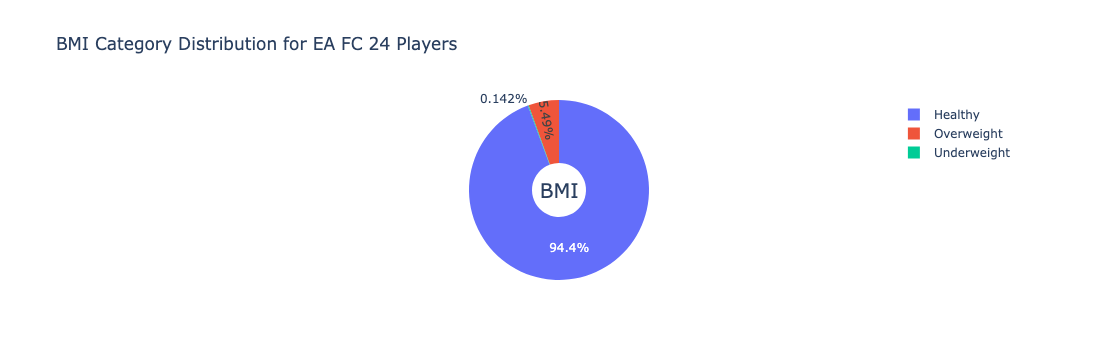

short_name  overall        BMI
32             M. Neuer       87  24.967113
60  S. Milinković-Savić       86  25.770399
42           M. de Ligt       86  24.915316
72             A. Onana       85  25.761773
82          J. Grealish       85  25.000000

In [34]:
# Define bins for categorization: Underweight (BMI < 18.5), Healthy (18.5 <= BMI <= 24.9), Overweight (BMI > 24.9)
df_clean['BMI_category'] = pd.cut(
    df_clean['BMI'],
    bins=[0, 18.5, 24.9, float('inf')],
    labels=['Underweight', 'Healthy', 'Overweight']
)

# Save the updated DataFrame to a CSV file without the index column
df_clean.to_csv('df_clean.csv', index=False)

# Filter the DataFrame to include only rows where 'fifa_version' is 24.0
df_24_clean = df_clean[df_clean['fifa_version'] == 24.0].copy()

# Count the number of players in each 'BMI_category' for the filtered DataFrame
bmi_counts = df_24_clean['BMI_category'].value_counts()

# Create a pie chart to visualize the distribution of BMI categories
fig = go.Figure(data=[go.Pie(labels=bmi_counts.index, values=bmi_counts.values, hole=.3)])
fig.update_layout(
    title_text="BMI Category Distribution for EA FC 24 Players",
    annotations=[dict(text='BMI', x=0.5, y=0.5, font_size=20, showarrow=False)]
)
fig.show()

# Find the top 5 players categorized as 'Overweight', sorted by 'overall' rating in descending order
top_overweight = df_24_clean[df_24_clean['BMI_category'] == 'Overweight'].sort_values(
    by='overall', ascending=False
).head(5)
top_overweight[['short_name', 'overall', 'BMI']]

### Distribution of Player Traits

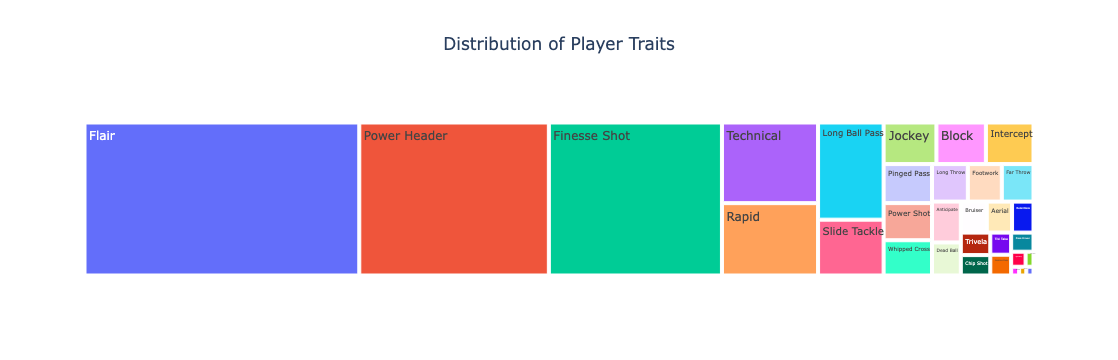

In [35]:
# Split 'player_traits' column by commas and stack the result into a Series
traits_series = df_clean['player_traits'].str.split(',', expand=True).stack()

# Count occurrences of each trait and reset index to convert to DataFrame
trait_counts = traits_series.value_counts().reset_index()
trait_counts.columns = ['player_traits', 'count']

# Filter traits to include only those present in df_24_clean
trait_counts_24 = trait_counts[trait_counts['player_traits'].isin(df_24_clean['player_traits'].unique())]

# Save filtered trait counts to a CSV file
trait_counts_24.to_csv('trait_counts_24.csv', index=False)

# Create and show a treemap visualization of the trait distribution
fig = px.treemap(
    trait_counts_24, 
    path=['player_traits'], 
    values='count',
    title='Distribution of Player Traits',
)
fig.update_traces(hovertemplate='Trait: %{label}<br>Count: %{value}<extra></extra>')
fig.update_layout(title='Distribution of Player Traits', title_x=0.5)
fig.show()

### Players' Age Histogram

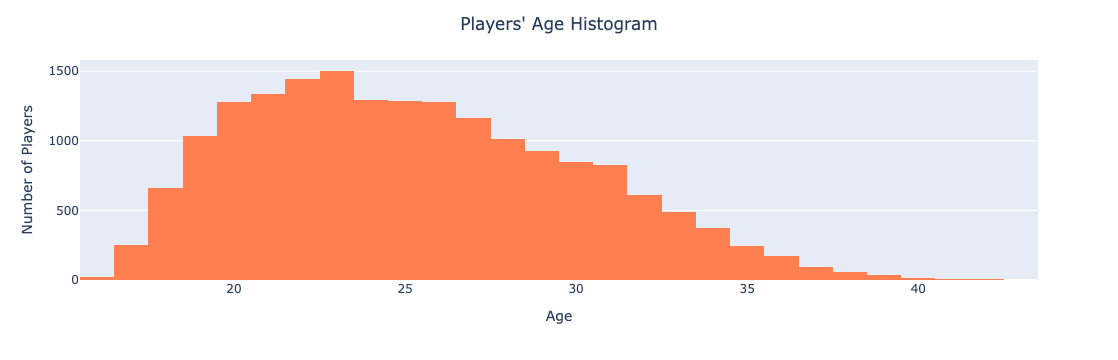

In [36]:
# Create a histogram of player ages with 30 bins
fig = px.histogram(df_24_clean, x='age', nbins=30, color_discrete_sequence=['coral'])

# Update the layout with titles and axis labels
fig.update_layout(
    title='Players\' Age Histogram',      # Title of the histogram
    title_x=0.5,                         # Center the title
    xaxis_title='Age',                   # X-axis label
    yaxis_title='Number of Players',     # Y-axis label
    hovermode='x unified'                # Unified hover mode for better readability
)
fig.show()

### Percentage of Players by Position Category

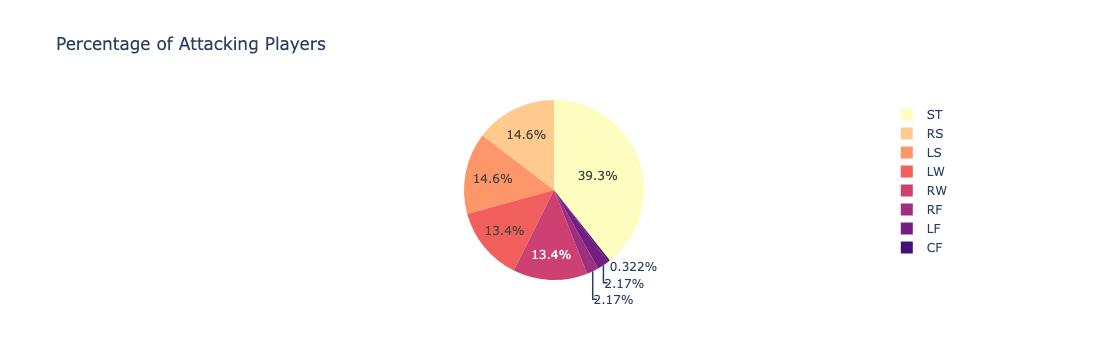

In [37]:
# Define lists of position abbreviations for different categories
attack = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']
midfield = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM', 'CM', 'LAM']
defence = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB', 'GK']

# Function to categorize positions into 'Attack', 'Midfield', or 'Defence'
def categorize_position(position):
    if position in attack:
        return 'Attack'
    elif position in midfield:
        return 'Midfield'
    elif position in defence:
        return 'Defence'
    else:
        return 'Unknown'

# Apply the categorize_position function to 'club_position' and create a new column 'Position_Category'
df_clean['Position_Category'] = df_clean['club_position'].apply(categorize_position)

# Create a DataFrame with unique pairs of 'club_position' and 'Position_Category' and save it to a CSV file
df_position_category = df_clean[['club_position', 'Position_Category']].drop_duplicates()
df_position_category.to_csv('df_position_category.csv', index=False)

# Filter the DataFrame for attacking players only
att_p = df_24_clean.query('club_position in @attack')

# Create a pie chart to show the percentage distribution of attacking players by their position
fig = px.pie(att_p, names='club_position', color_discrete_sequence=px.colors.sequential.Magma_r,
            title='Percentage of Attacking Players')
fig.show()

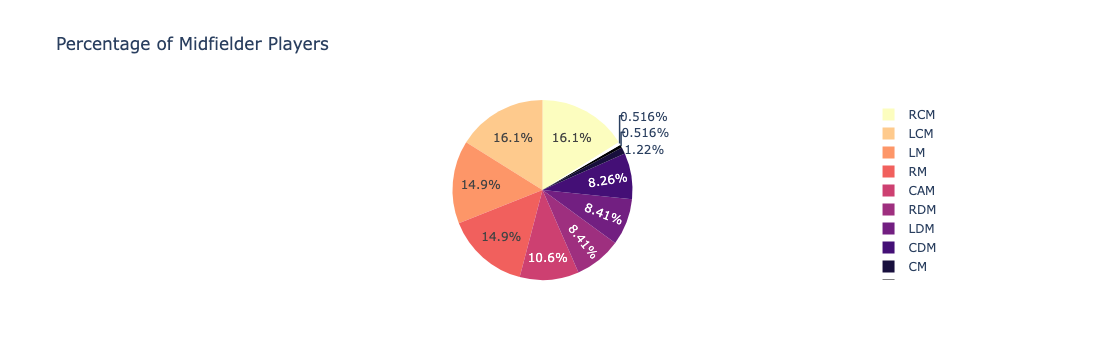

In [38]:
# Filter the DataFrame for midfielder players only
mid_p = df_24_clean.query('club_position in @midfield')

# Create a pie chart to show the percentage distribution of midfielder players by their position
fig = px.pie(mid_p, names='club_position', color_discrete_sequence=px.colors.sequential.Magma_r,
            title='Percentage of Midfielder Players')
fig.show()

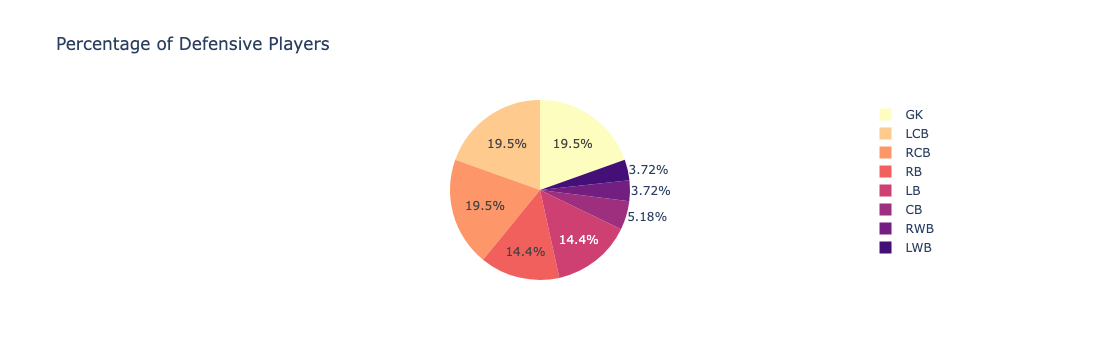

In [39]:
# Filter the DataFrame for defensive players only
def_p = df_24_clean.query('club_position in @defence')

# Create a pie chart to show the percentage distribution of defensive players by their position
fig = px.pie(def_p, names='club_position', color_discrete_sequence=px.colors.sequential.Magma_r,
            title='Percentage of Defensive Players')
fig.show()

<a id="modelling"></a>
## **Modelling**

### Overall vs Market Value Scatter Plot
> In this chart, the correlation between two variables was demonstrated, they are codependent, even though we see a third important variable (age) which was chosen as a colour filter.

In [40]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define an exponential function for fitting
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Filter the DataFrame to include only 'value_eur' and 'overall' columns, and drop rows with missing values
df_filtered = df_24_clean[['value_eur', 'overall']].dropna()

# Extract the independent variable (overall rating) and dependent variable (value in EUR)
X = df_filtered['overall']
y = df_filtered['value_eur']

# Fit the exponential function to the data, with initial guesses for parameters
params, _ = curve_fit(exponential_func, X, y, p0=(1, 0.1))

# Predict values using the fitted parameters
df_filtered['predicted_value'] = exponential_func(X, *params)

# Calculate R-squared to evaluate the fit of the model
r_squared = r2_score(y, df_filtered['predicted_value'])
print(f'R-squared: {r_squared:.4f}')

R-squared: 0.8296


> The r-squared is 0.83, this means that the correlation is actually strong and lead to a positive conclusion. The same model was applied in the Tableau dashboard, where the model can be modified by choosing a metric and filters like the FIFA version.

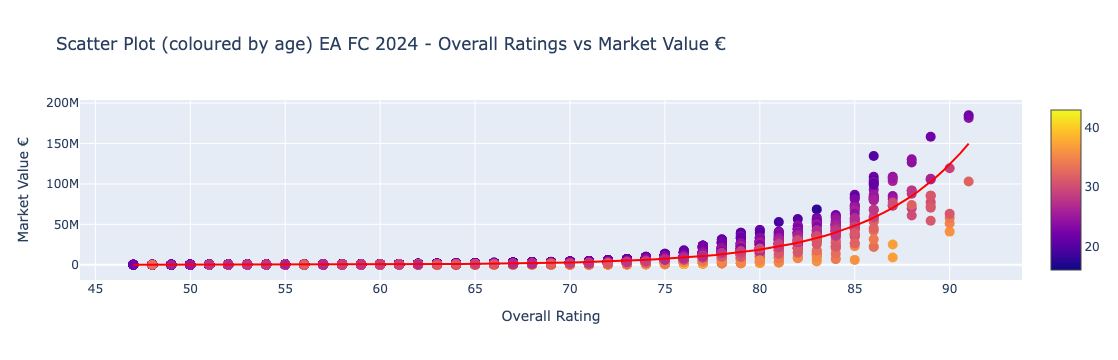

In [41]:
import numpy as np
import plotly.graph_objects as go

# Create a new figure for the scatter plot
fig = go.Figure()

# Add a scatter trace for the actual data points
fig.add_trace(go.Scatter(
    x=df_24_clean['overall'], y=df_24_clean['value_eur'], mode='markers',                          
    marker=dict(size=10, color=df_24_clean['age'], showscale=True),
    text=df_24_clean['short_name'], name='Players', showlegend=False                        
))

# Add a scatter trace for the exponential fit line
fig.add_trace(go.Scatter(
    x=np.linspace(df_filtered['overall'].min(), df_filtered['overall'].max(), 100),  
    y=exponential_func(np.linspace(df_filtered['overall'].min(), df_filtered['overall'].max(), 100), *params),
    mode='lines', line=dict(color='red'), name='Exponential Fit', showlegend=False                        
))

# Update the layout of the figure
fig.update_layout(
    title='Scatter Plot (coloured by age) EA FC 2024 - Overall Ratings vs Market Value €',
    xaxis_title='Overall Rating', yaxis_title='Market Value €',  
)
fig.show()

---

<a id="interpretation"></a>
## **Interpretation**

### Player Growth Tracker throughout the Years

In [42]:
# Filter the DataFrame for each FIFA version and create separate DataFrames
df_15 = df_clean[df_clean['fifa_version'] == 15.0]  # Data for FIFA version 15
df_16 = df_clean[df_clean['fifa_version'] == 16.0]  # Data for FIFA version 16
df_17 = df_clean[df_clean['fifa_version'] == 17.0]  # Data for FIFA version 17
df_18 = df_clean[df_clean['fifa_version'] == 18.0]  # Data for FIFA version 18
df_19 = df_clean[df_clean['fifa_version'] == 19.0]  # Data for FIFA version 19
df_20 = df_clean[df_clean['fifa_version'] == 20.0]  # Data for FIFA version 20
df_21 = df_clean[df_clean['fifa_version'] == 21.0]  # Data for FIFA version 21
df_22 = df_clean[df_clean['fifa_version'] == 22.0]  # Data for FIFA version 22
df_23 = df_clean[df_clean['fifa_version'] == 23.0]  # Data for FIFA version 23
df_24 = df_clean[df_clean['fifa_version'] == 24.0]  # Data for FIFA version 24

# Define a list of player attributes to analyze
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall', 'potential']

In [43]:
import plotly.graph_objects as go

def playergrowth(name):
    # Filter DataFrames for the given player's name across different FIFA versions
    data24 = df_24[df_24.short_name.str.contains(name, case=False, na=False)]  # Data for 2024
    data23 = df_23[df_23.short_name.str.contains(name, case=False, na=False)]  # Data for 2023
    data22 = df_22[df_22.short_name.str.contains(name, case=False, na=False)]  # Data for 2022
    data21 = df_21[df_21.short_name.str.contains(name, case=False, na=False)]  # Data for 2021
    data20 = df_20[df_20.short_name.str.contains(name, case=False, na=False)]  # Data for 2020
    data19 = df_19[df_19.short_name.str.contains(name, case=False, na=False)]  # Data for 2019
    data18 = df_18[df_18.short_name.str.contains(name, case=False, na=False)]  # Data for 2018
    data17 = df_17[df_17.short_name.str.contains(name, case=False, na=False)]  # Data for 2017
    data16 = df_16[df_16.short_name.str.contains(name, case=False, na=False)]  # Data for 2016
    data15 = df_15[df_15.short_name.str.contains(name, case=False, na=False)]  # Data for 2015

    # Save the 2024 DataFrame to a CSV file
    df_24.to_csv('df_24.csv', index=False)
    
    # Define the list of attributes to be plotted
    attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall', 'potential']
    
    # Initialize a list to hold scatter polar traces
    traces = []
    for data, year in zip(
        [data24, data23, data22, data21, data20, data19, data18, data17, data16, data15],
        ['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015']
    ):
        if not data.empty:
            short_name = data.iloc[0]['short_name']  # Get the player's short name
            trace = go.Scatterpolar(
                r = [data['pace'].values[0], data['shooting'].values[0],
                     data['passing'].values[0], data['dribbling'].values[0],
                     data['defending'].values[0], data['physic'].values[0],
                     data['overall'].values[0], data['potential'].values[0]
                    ],  # Radar chart values
                theta = attributes,  # Attribute labels
                fill = 'toself',  # Fill the area under the line
                name = year  # Legend name for the year
            )
            traces.append(trace)  # Add the trace to the list
        else:
            print(f"No data found for {name} in {year}")  # Notify if no data is found for that year

    # If there are traces, create and display the radar chart
    if traces:
        layout = go.Layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,  # Show radial axis
                    range=[0, 100]  # Set range for radial axis
                )
            ),
            showlegend=True,  # Show legend
            title=f'Statistics related to {short_name} from 2015 to 2024'  # Chart title
        )
        fig = go.Figure(data=traces, layout=layout)  # Create the figure
        fig.show()  # Display the figure
    else:
        print(f"No data found for {name} in 2024")  # Notify if no data is found for 2024

> Now, you are able to enter the function 'playergrowth' and the player short name.

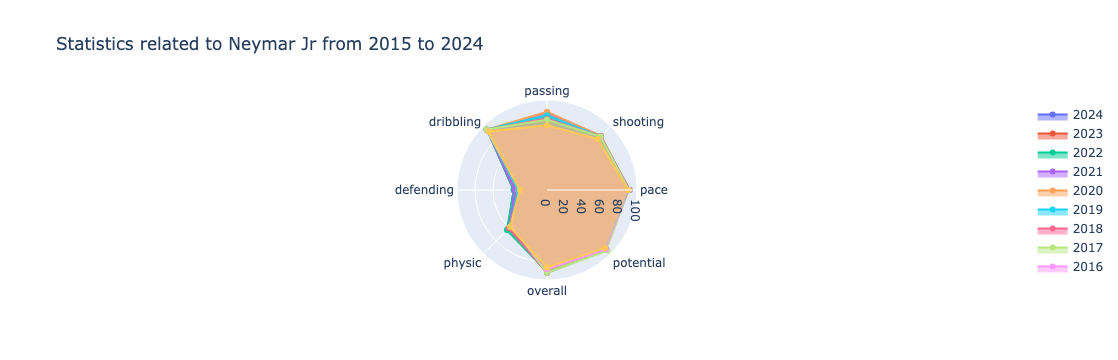

In [44]:
playergrowth('Neymar')

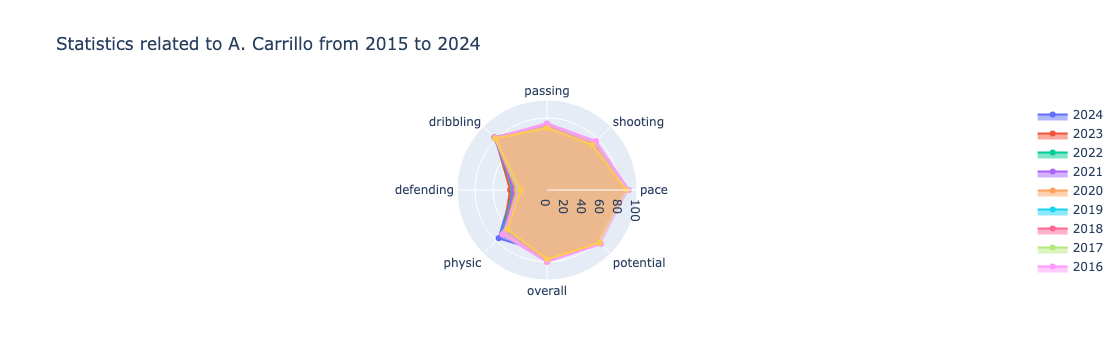

In [45]:
playergrowth('Carrillo')

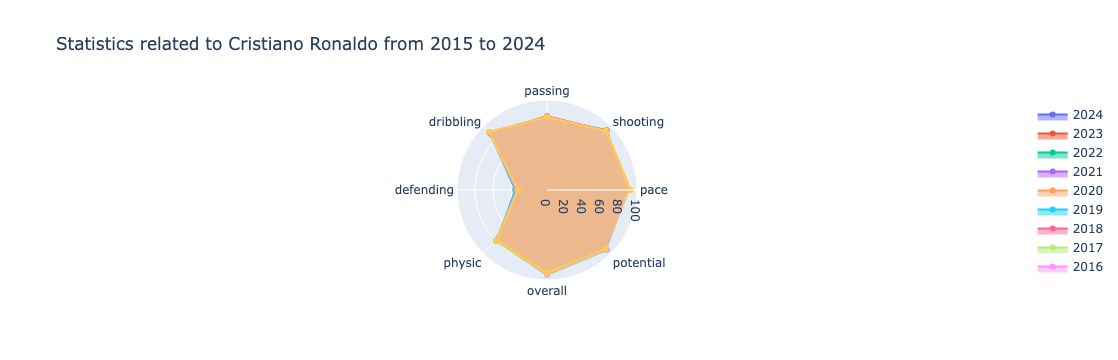

In [46]:
playergrowth('Cristiano Ronaldo')

### Top Players Finder sorted by Potential and Market Value

In [47]:
def pick_top_players(pos, value, nation=None):
    # Convert value from millions to EUR
    value_in_eur = value * 1_000_000
    
    # Construct column name based on the position
    column = 'Position_' + pos.upper()
    
    # Create conditions for filtering players by position and value
    conditions = (df_24[column] == 1) & (df_24['value_eur'] <= value_in_eur)
    
    # If a nation is specified, add it to the filtering conditions
    if nation:
        conditions &= df_24['nationality_name'] == nation
        
    # Filter the DataFrame based on conditions and select relevant columns
    target_players = df_24[conditions][['short_name', 'age', 'nationality_name', 'overall', 'potential', 'value_eur']]
    
    # Format the 'value_eur' column to display in millions
    target_players['value_eur'] = (target_players['value_eur'] / 1_000_000).apply(lambda x: f"{x:.2f} M €")
    
    # Sort players by 'potential' and 'overall' in descending order, then select the top 5
    target_players = target_players.sort_values(by=['potential', 'overall'], ascending=[False, False]).head(5)
    return target_players

> By using the function 'pick_top_players', you can filter the target player by position, market value and nationality.

In [48]:
pick_top_players('lb',45, 'Italy')

short_name  age nationality_name  overall  potential  value_eur
847       F. Parisi   22            Italy       77         87  22.50 M €
852       D. Udogie   20            Italy       77         86  22.00 M €
1810    A. Cambiaso   23            Italy       74         83   9.00 M €
10641     M. Kayode   18            Italy       64         82   1.40 M €
3592   R. Calafiori   21            Italy       71         81   4.00 M €

In [49]:
pick_top_players('cm',75, )

short_name  age nationality_name  overall  potential  value_eur
142           Gavi   18            Spain       83         90  68.50 M €
91   A. Tchouaméni   23           France       84         89  58.50 M €
144   E. Fernández   22        Argentina       83         89  58.00 M €
198   E. Camavinga   20           France       82         89  56.50 M €
649    Gabri Veiga   21            Spain       78         89  31.50 M €

In [50]:
pick_top_players('rw',10, 'Brazil')

short_name  age nationality_name  overall  potential value_eur
5205           Ângelo   18           Brazil       69         86  3.50 M €
7233  Matheus Martins   19           Brazil       67         83  2.60 M €
3600       Marquinhos   20           Brazil       71         81  4.10 M €
6226     Pablo Felipe   19           Brazil       68         81  2.90 M €
4365          Reinier   21           Brazil       70         80  3.60 M €

### Similar Players Finder
> This powerful search tool is the grand conclusion of this project. This tool may be used by professionals in the scouting department of a first-division football team, by using real-life stats.

In [51]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def radar_chart_comparison(player_stats, similar_players_stats, attributes, player_name, similar_players_names):
    # Create a new figure for the radar chart
    fig = go.Figure()
    
    # Add trace for the target player
    fig.add_trace(go.Scatterpolar(
        r=player_stats.tolist() + player_stats[:1].tolist(),  # Close the radar chart loop
        theta=attributes + [attributes[0]],  # Complete the theta labels loop
        fill='toself',  # Fill the area under the line
        name=player_name,  # Legend name for the target player
        line_color='blue'  # Line color for the target player
    ))
    # Add traces for similar players
    for stats, name in zip(similar_players_stats, similar_players_names):
        fig.add_trace(go.Scatterpolar(
            r=stats.tolist() + stats[:1].tolist(),  # Close the radar chart loop
            theta=attributes + [attributes[0]],  # Complete the theta labels loop
            fill='toself',  # Fill the area under the line
            name=name  # Legend name for each similar player
        ))
    # Create buttons for updating the chart view
    buttons = [dict(
            method="update",
            label="All",
            args=[{"visible": [True] * (len(similar_players_names) + 1)},  # Show all traces
                  {"title": f"Comparison: {player_name} vs All Similar Players"}]  # Update chart title
        )]
    # Add buttons to compare the target player with each similar player individually
    for i, name in enumerate(similar_players_names):
        buttons.append(dict(
            method="update",
            label=name,
            args=[{"visible": [True] + [j == i for j in range(len(similar_players_names))]},  # Show only selected similar player
                  {"title": f"Comparison: {player_name} vs {name}"}]  # Update chart title
        ))
    # Update the layout with the buttons and other settings
    fig.update_layout(
        updatemenus=[dict(active=0, buttons=buttons, x=0.1, xanchor="left", y=1.15, yanchor="top")],
        polar=dict(radialaxis=dict(visible=True, range=[0, 100])),  # Set radial axis range
        showlegend=True,  # Show legend
        title=f"Comparison: {player_name} vs All Similar Players"  # Initial title
    )
    fig.show()

def find_similar_players(player_name, num_players=5):
    # List of attributes for comparison
    attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall', 'potential']
    
    # Identify position columns in the DataFrame
    position_columns = [col for col in df_24_clean.columns if col.startswith('Position_')]
    
    # Filter the target player from the DataFrame
    target_player = df_24_clean[df_24_clean['short_name'].str.contains(player_name, case=False, na=False)]
    
    # Return a message if the target player is not found
    if target_player.empty:
        return f"Player containing '{player_name}' in their name not found."

    # Create conditions to match players with the same positions as the target player
    pos_conditions = (df_24_clean[position_columns] == target_player[position_columns].values).any(axis=1)
    filtered_df = df_24_clean[pos_conditions]
    
    # Standardize the attributes for comparison
    scaler = StandardScaler()
    scaled_attributes = scaler.fit_transform(filtered_df[attributes])
    
    # Transform target player attributes using the same scaler
    target_attributes = scaler.transform(target_player[attributes])
    
    # Calculate similarity scores between the target player and all filtered players
    similarities = cosine_similarity(target_attributes, scaled_attributes)
    
    # Add similarity scores and target player name to the DataFrame
    filtered_df['similarity'] = similarities[0] * 100
    filtered_df['target_short_name'] = target_player['short_name'].values[0]
    
    # Sort players by similarity score in descending order and select the top players
    similar_players = filtered_df.sort_values(by='similarity', ascending=False).head(num_players + 1)
    similar_players = similar_players[similar_players['short_name'] != target_player['short_name'].values[0]]  # Exclude the target player
    
    # Format the similarity scores and market value for display
    similar_players['similarity'] = similar_players['similarity'].apply(lambda x: f"{x:.2f}%")
    target_player_stats = target_player[attributes].values[0]
    similar_players_stats = [row[attributes].values for _, row in similar_players.iterrows()]
    similar_players_names = similar_players['short_name'].tolist()

    # Create radar chart comparison
    radar_chart_comparison(target_player_stats, similar_players_stats, attributes, target_player['short_name'].values[0], similar_players_names)
    
    # Format the 'value_eur' column to display in millions
    similar_players['value_eur'] = (similar_players['value_eur'] / 1_000_000).apply(lambda x: f"{x:.2f} M €")
    return similar_players[['short_name', 'age', 'overall', 'potential', 'value_eur', 'similarity']]

> Now, you should be able to obtain a number of comparable players, their age, potential, market value, and similarity % by effectuating the 'find_similar_players' function and typing the targeted player short name and the desired given player's number. Additionally, you have a Scatter Polar with a dropdown menu for selecting a player to compare. 

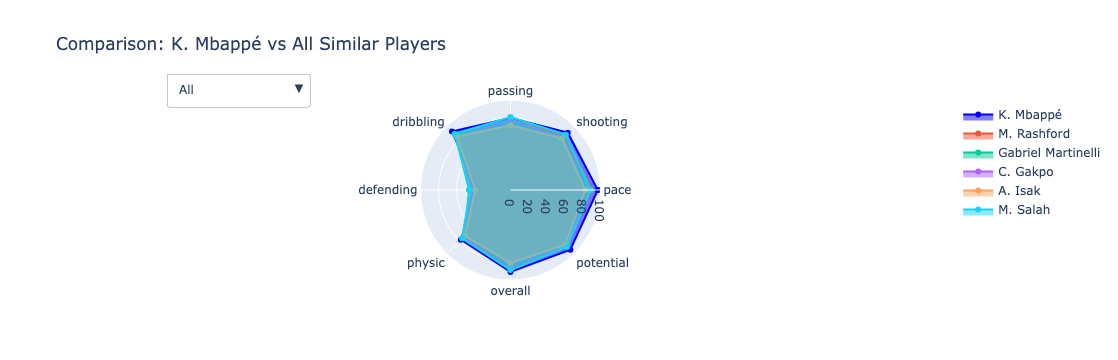

short_name  age  overall  potential  value_eur similarity
67          M. Rashford   25       85         88  71.50 M €     99.60%
95   Gabriel Martinelli   22       84         88  61.50 M €     99.52%
146            C. Gakpo   24       83         88  55.50 M €     99.31%
278             A. Isak   23       81         86  39.50 M €     99.25%
16             M. Salah   31       89         89  85.50 M €     99.24%

In [52]:
find_similar_players("Mbappé")

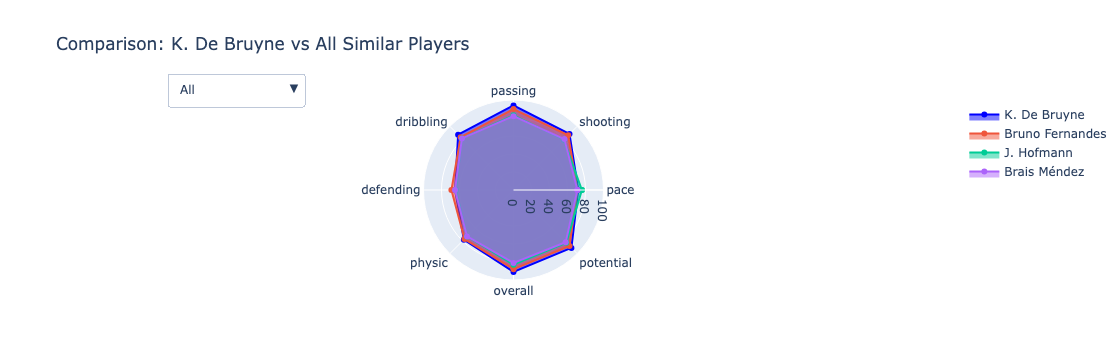

short_name  age  overall  potential  value_eur similarity
23   Bruno Fernandes   28       88         88  92.00 M €     99.78%
189       J. Hofmann   30       83         83  35.00 M €     99.20%
308     Brais Méndez   26       81         82  30.00 M €     99.17%

In [53]:
find_similar_players("De Bruyne", 3)

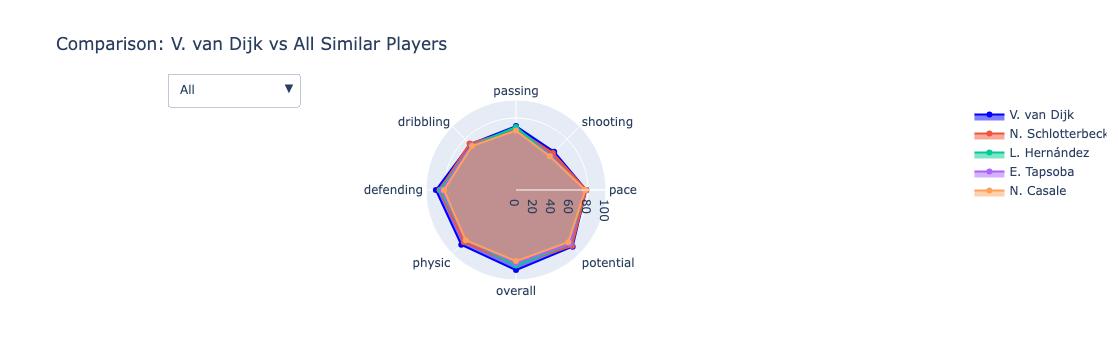

short_name  age  overall  potential  value_eur similarity
148  N. Schlotterbeck   23       83         88  49.50 M €     99.27%
111      L. Hernández   27       84         85  42.50 M €     99.23%
281        E. Tapsoba   24       81         85  33.00 M €     99.20%
535         N. Casale   25       79         82  20.50 M €     98.90%

In [54]:
find_similar_players("van Dijk", 4)

## **[Tableau Dashboard](https://public.tableau.com/views/TableauProject_17241256666710/Dashboard1?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)**

Here is the link to my Tableau public dashboard, which includes some charts used here, as well as a new interactive map where you choose which metric to evaluate. All four charts interact between themselves, thus improving the user experience.

<a id="conclusion"></a>
## **Conclusion**

This project has allowed me to combine my emerging interest in data analysis with my ever-longing passion for football, which has been a gratifying journey. I was able to investigate, model, and interpret player data in a way that is consistent with both in-game decision-making and real-world scouting techniques by utilizing a dataset that covered FIFA 15 to EA FC 24.

In the course of this project, we:

- **Scrubbed the data**: To guarantee correctness and dependability in our study, we cleaned and prepared the dataset.
- **Examined the information**: carried out exploratory data analysis to identify important links, trends, and insights in the dataset.
- **Modelled the information**: created predictive algorithms that can be used by professional scouts and FIFA gamers alike to find players with high potential and worth.
- **Examined the outcomes**: drew insightful findings from the models and provided helpful advice for scouting and player selection.

This research improved my comprehension of how data can be used to make wise judgments in football while also strengthening my analytical abilities. The concepts and methods employed here are easily transferable to big data in the present day, offering football scouting teams—a vocation I hope to pursue—valuable insights.

I'm excited to use these techniques in practical settings as I continue to hone my abilities and add to the dynamic area of football analytics. I'm excited about the prospects that lay ahead as this project marks a big step toward my goal of working as a data analyst for a football scouting squad.